<a href="https://colab.research.google.com/github/RUCUAL/Machine-Learning/blob/main/Unidad02/%C3%81rbol%20de%20Decisi%C3%B3n%20para%20Regresi%C3%B3n%20(Decision%20Tree%20Regressor).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2. Árbol de Decisión para Regresión (Decision Tree Regressor)
Este modelo introduce el concepto de modelado no lineal y la segmentación de datos.
Ejecución y Ajuste de Parámetros:
1. Ejecución 1 (Profundidad Limitada): Entrenar el modelo con las variables iniciales,
limitando la profundidad máxima (max_depth) a un valor pequeño (ej., 3 o 4).
o Propósito: Evitar el sobreajuste (overfitting) y permitir la visualización del árbol.
2. Ejecución 2 (Profundidad Libre o Ajustada): Entrenar un segundo modelo sin límite
de profundidad o utilizando un max_depth mayor (ej., 8) o ajustado por validación
cruzada.
3. Análisis:
o Comparar el (R2)de entrenamiento con el (R2) de prueba en ambos casos para
ilustrar el riesgo de sobreajuste en el Árbol de Decisión.
o Identificar la Importancia de Características que proporciona el modelo.

**CARGAR LIBRERIRAS Y DATOS**

**librerías necesarias**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

**Cargar el dataset**

In [2]:
file_name = 'DATASET_Asesinatos.csv'
try:
    df = pd.read_csv(file_name, encoding='latin-1')
    print(f"Dataset '{file_name}' cargado exitosamente.")
except FileNotFoundError:
    print(f"ERROR: No se encontró el archivo '{file_name}'. Asegúrate de subirlo a Colab.")

Dataset 'DATASET_Asesinatos.csv' cargado exitosamente.


**Inspección Inicial**

In [3]:
print("\n--- Inspección de Datos ---")
print(f"Dimensiones del Dataset (filas, columnas): {df.shape}")
print("\nPrimeras 5 filas:")
print(df.head())
print("\nInformación de tipos de datos y valores nulos:")
df.info()


--- Inspección de Datos ---
Dimensiones del Dataset (filas, columnas): (3000, 16)

Primeras 5 filas:
                Estado  id_area  habitantes  area_km2  ingresos_medios  \
0               Puebla        1      207953     26.70            48018   
1              Durango        2       80226     17.39            50295   
2              Tabasco        3      260806     70.69            50795   
3  Baja California Sur        4      969508    830.49            68910   
4       Aguascalientes        5       69478     30.59            54248   

   edad_media_poblacion  densidad_poblacional  indice_gini  \
0                  40.8               7787.47        0.522   
1                  42.4               4612.66        0.346   
2                  39.5               3689.22        0.417   
3                  27.3               1167.39        0.399   
4                  36.2               2271.26        0.422   

   tasa_desempleo_juvenil  porcentaje_sin_diploma_secundaria  \
0               

**Verificación de Variables Clave**

In [4]:
target_variable = 'tasa_asesinatos_por_100mil'
initial_predictors = [
    'indice_gini',
    'tasa_desempleo_juvenil',
    'porcentaje_sin_diploma_secundaria',
    'ingresos_medios',
    'densidad_poblacional',
    'gasto_policial_per_capita',
    'inversion_programas_sociales_per_capita'
]

missing_cols = [col for col in [target_variable] + initial_predictors if col not in df.columns]

if missing_cols:
    print(f"\n ERROR: Faltan las siguientes columnas requeridas: {missing_cols}")
else:
    print("\n Todas las variables objetivo y predictoras iniciales están presentes.")


 Todas las variables objetivo y predictoras iniciales están presentes.


**Preparación para el modelado: Manejo de Nulos (si los hay)**

In [5]:
rows_before = df.shape[0]
df.dropna(subset=[target_variable] + initial_predictors, inplace=True)
rows_after = df.shape[0]

if rows_before > rows_after:
    print(f"\nSe eliminaron {rows_before - rows_after} filas con valores nulos para las variables clave.")
else:
    print("\nNo se encontraron valores nulos en las variables clave.")


No se encontraron valores nulos en las variables clave.


**Calcular la correlación de Pearson con la variable objetivo**

In [6]:
target_variable = 'tasa_asesinatos_por_100mil'
initial_predictors = [
    'indice_gini',
    'tasa_desempleo_juvenil',
    'porcentaje_sin_diploma_secundaria',
    'ingresos_medios',
    'densidad_poblacional',
    'gasto_policial_per_capita',
    'inversion_programas_sociales_per_capita'
]

correlation_matrix = df[[target_variable] + initial_predictors].corr()
target_correlations = correlation_matrix[target_variable].drop(target_variable).sort_values(ascending=False)

print("\n--- Correlación de Pearson con 'tasa_asesinatos_por_100mil' ---")
print(target_correlations)


--- Correlación de Pearson con 'tasa_asesinatos_por_100mil' ---
indice_gini                                0.550872
porcentaje_sin_diploma_secundaria          0.346234
tasa_desempleo_juvenil                     0.261754
densidad_poblacional                       0.164929
gasto_policial_per_capita                 -0.011940
inversion_programas_sociales_per_capita   -0.050768
ingresos_medios                           -0.284239
Name: tasa_asesinatos_por_100mil, dtype: float64


**Visualización de las correlaciones**

/tmp/ipython-input-908738934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_correlations.values, y=target_correlations.index, palette="viridis")


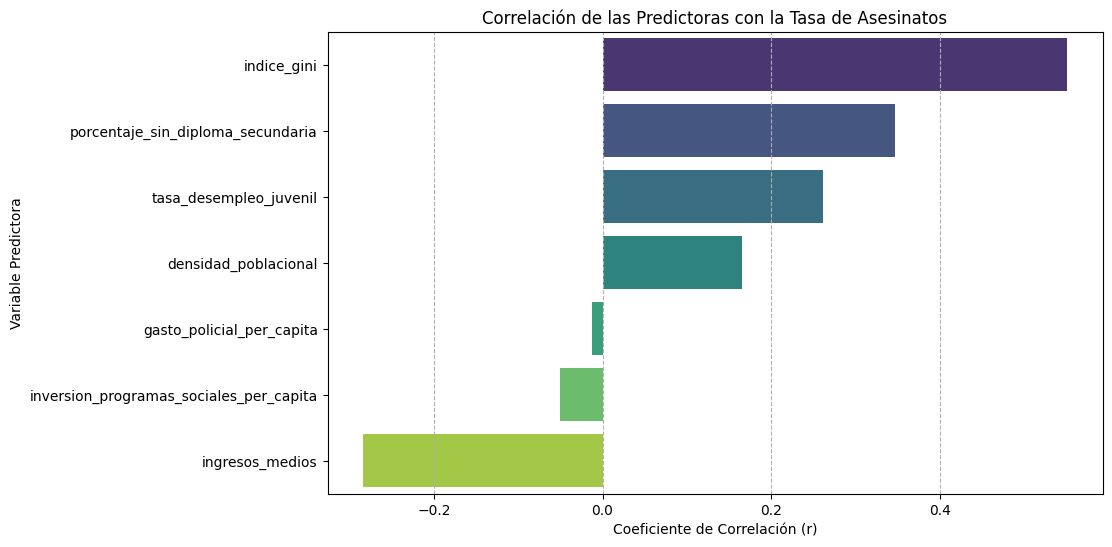

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x=target_correlations.values, y=target_correlations.index, palette="viridis")
plt.title('Correlación de las Predictoras con la Tasa de Asesinatos')
plt.xlabel('Coeficiente de Correlación (r)')
plt.ylabel('Variable Predictora')
plt.grid(axis='x', linestyle='--')
plt.show()

#**Ejecución 1: Profundidad Limitada**

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

**Entrenar el modelo con profundidad limitada**

In [29]:
dt_regressor_limited = DecisionTreeRegressor(max_depth=4, random_state=42)
dt_regressor_limited.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

**Evaluar R2 en conjunto de entrenamiento**

In [30]:
Y_train_pred_limited = dt_regressor_limited.predict(X_train)
r2_train_limited = r2_score(Y_train, Y_train_pred_limited)

**Evaluar R2 en conjunto de prueba**

In [33]:
Y_test_pred_limited = dt_regressor_limited.predict(X_test)
r2_test_limited = r2_score(Y_test, Y_test_pred_limited)

print("--- Resultados Árbol de Decisión (max_depth=4) ---")
print(f"R2 de Entrenamiento: {r2_train_limited:.4f}")
print(f"R2 de Prueba:        {r2_test_limited:.4f}")

--- Resultados Árbol de Decisión (max_depth=4) ---
R2 de Entrenamiento: 0.4345
R2 de Prueba:        0.3656


**Visualización del Árbol de Decisión**

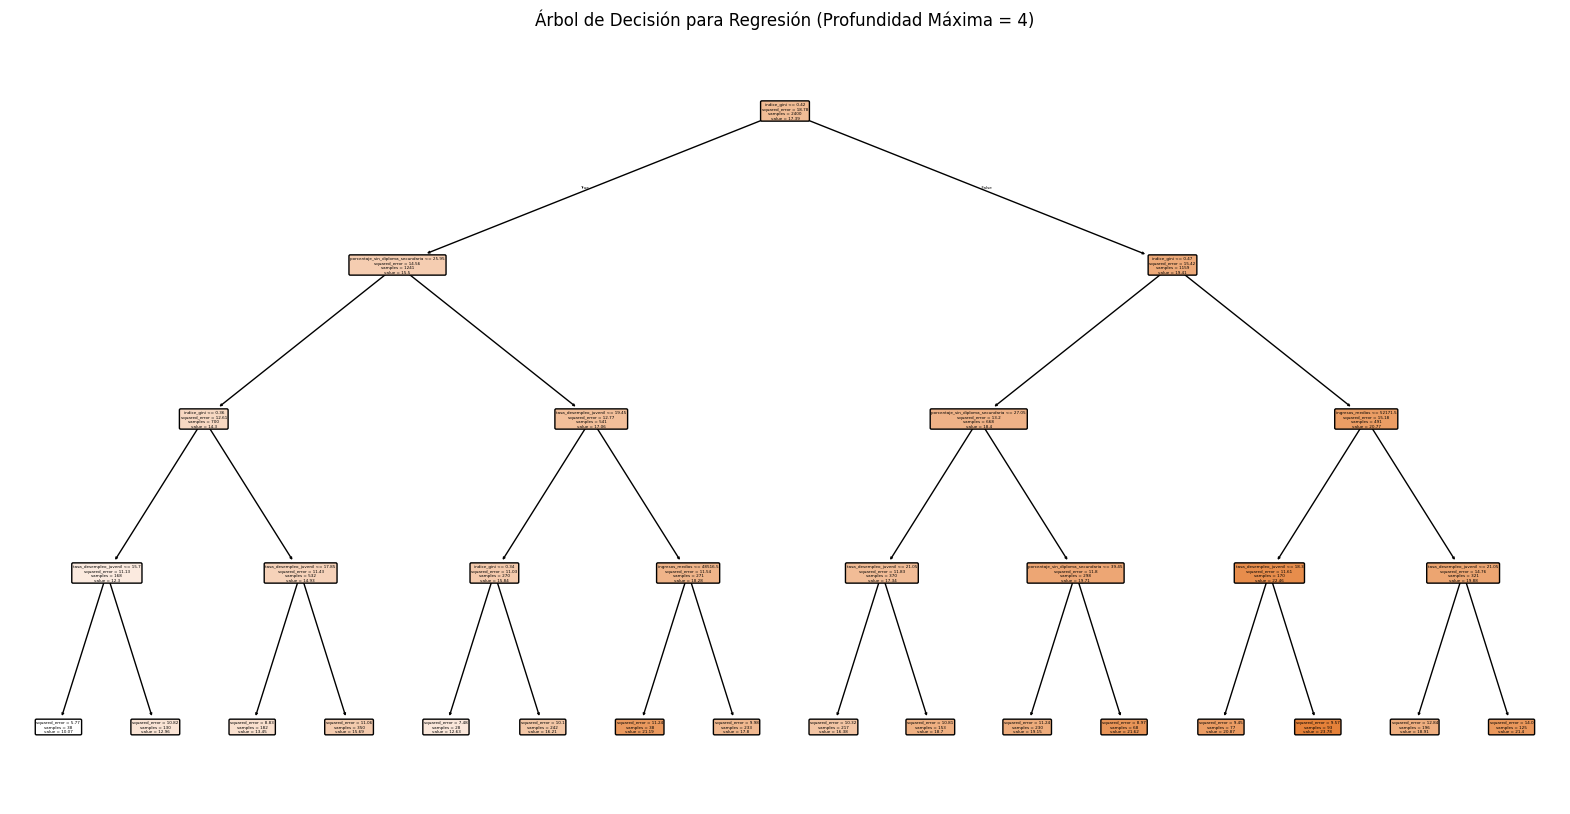

In [34]:
plt.figure(figsize=(20, 10))
plot_tree(
    dt_regressor_limited,
    feature_names=X.columns.tolist(),
    filled=True,
    rounded=True,
    precision=2
)
plt.title("Árbol de Decisión para Regresión (Profundidad Máxima = 4)")
plt.savefig('decision_tree_depth4.png')
plt.show()

#**Ejecución 2: Profundidad Libre**

**Entrenar el modelo sin límite de profundidad (por defecto)**

In [35]:
dt_regressor_full = DecisionTreeRegressor(random_state=42)
dt_regressor_full.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

**Evaluar R2 en conjunto de entrenamiento**

In [36]:
Y_train_pred_full = dt_regressor_full.predict(X_train)
r2_train_full = r2_score(Y_train, Y_train_pred_full)

**Evaluar R2 en conjunto de prueba**

In [37]:
Y_test_pred_full = dt_regressor_full.predict(X_test)
r2_test_full = r2_score(Y_test, Y_test_pred_full)

print("--- Resultados Árbol de Decisión (Profundidad Libre) ---")
print(f"R2 de Entrenamiento: {r2_train_full:.4f}")
print(f"R2 de Prueba:        {r2_test_full:.4f}")

--- Resultados Árbol de Decisión (Profundidad Libre) ---
R2 de Entrenamiento: 1.0000
R2 de Prueba:        0.0427


#**Análisis de Sobreajuste e Importancia de Características**

In [38]:
print("--- Comparación de R2 (Entrenamiento vs. Prueba) ---")
print("{:<20} | {:<15} | {:<15} | {:<15}".format("Modelo", "R2 Entrenamiento", "R2 Prueba", "Diferencia (Overfitting)"))
print("-" * 60)
print("{:<20} | {:<15.4f} | {:<15.4f} | {:<15.4f}".format(
    "1. Depth=4 (Limitado)", r2_train_limited, r2_test_limited, r2_train_limited - r2_test_limited))
print("{:<20} | {:<15.4f} | {:<15.4f} | {:<15.4f}".format(
    "2. Depth=Libre (Full)", r2_train_full, r2_test_full, r2_train_full - r2_test_full))

--- Comparación de R2 (Entrenamiento vs. Prueba) ---
Modelo               | R2 Entrenamiento | R2 Prueba       | Diferencia (Overfitting)
------------------------------------------------------------
1. Depth=4 (Limitado) | 0.4345          | 0.3656          | 0.0689         
2. Depth=Libre (Full) | 1.0000          | 0.0427          | 0.9573         


#**Importancia de Características (Feature Importance)**

**Obtener las importancias de las características del modelo de profundidad limitada**

In [39]:
feature_importances = pd.Series(dt_regressor_limited.feature_importances_, index=X.columns)

**Graficar la importancia**

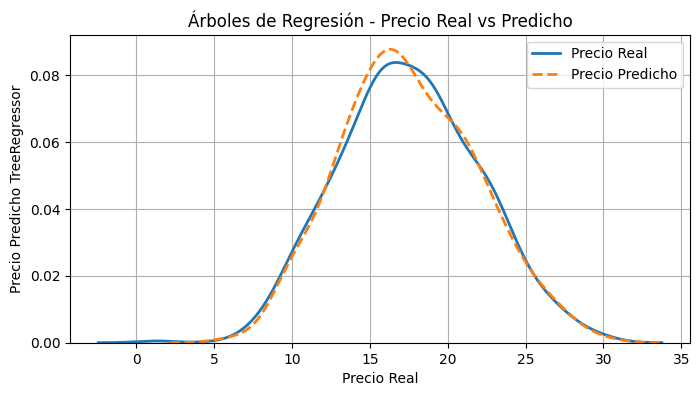

In [41]:
plt.figure(figsize=(8, 4))

sns.kdeplot(Y_test, label='Precio Real', linewidth=2)
sns.kdeplot(Y_test_pred_full, label='Precio Predicho', linewidth=2, linestyle='--')

plt.title('Árboles de Regresión - Precio Real vs Predicho')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho TreeRegressor')
plt.legend()
plt.grid(True)
plt.show()